In [28]:
# imports
from solvers import *
from solve_to import *
from shooting import *

import numpy as np
import matplotlib.pyplot as plt

In [29]:
# define a simple ODE
def ode(Y, t, args = ()):
    x, y = Y
    return np.array([y, -x])

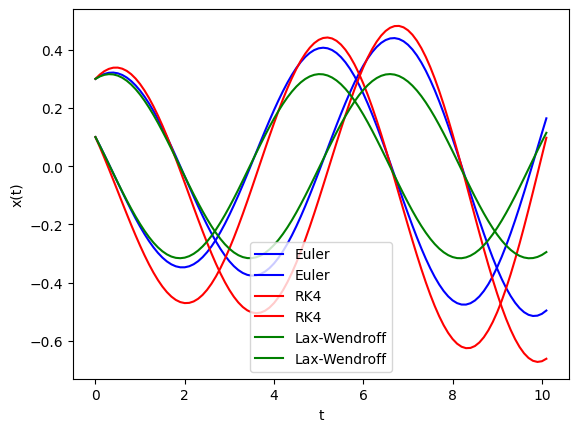

In [30]:
# testing solve_to and solvers

# run each method
def test_solvers():
    # define the initial conditions
    y0 = [0.3, 0.1]
    t0 = 0
    delta_t = 0.1

    # define the final time
    t1 = 10

    # solve the ODE
    Y_euler, t_e = solve_to(ode, y0, t0, t1, delta_t, 'Euler')
    Y_rk4, t_r = solve_to(ode, y0, t0, t1, delta_t, 'RK4')
    Y_lw, t_l = solve_to(ode, y0, t0, t1, delta_t, 'Lax-Wendroff')

    # plot the solution
    plt.plot(t_e, Y_euler, 'b', label='Euler')
    plt.plot(t_r, Y_rk4, 'r', label='RK4')
    plt.plot(t_l, Y_lw, 'g', label='Lax-Wendroff')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend(loc='best')
    plt.show()

# test the solvers
test_solvers()

Find the difference in behaviour for the predator prey equations.

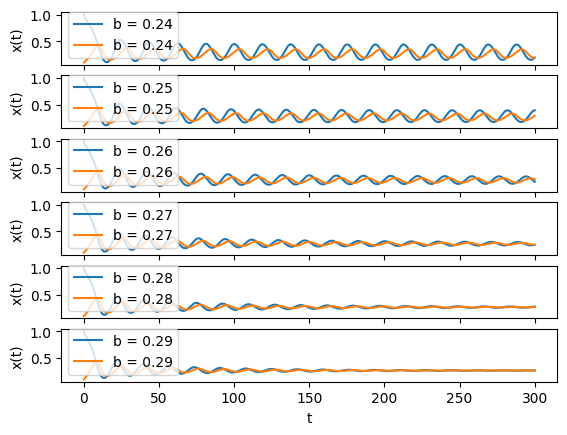

In [31]:
# shooting
a = 1
d = 0.1
b = 0.2

def ode(Y, t, args = (a, b, d)):
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

b_vals = np.linspace(0.24, 0.29, 6)
fig, ax = plt.subplots(len(b_vals), 1)

for i, b in enumerate(b_vals):
    Y, t = solve_to(ode, [1, 0.1], 0, 300, 0.01, 'RK4')
    # For each plot, plot y1(t) and y2(t) on the same plot against t
    ax[i].plot(t, Y, label='b = %.2f' %(b))
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('x(t)')
    ax[i].legend(loc='best')

plt.show()

In [32]:
# define new ode
a = 1
d = 0.1
b = 0.1

def ode(Y, t, args = (a, b, d)):
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

In [34]:
### test shooting and period

# solve the ode using the shooting method
Y,t,guess = shooting(ode, 0.1,'RK4')
plt.show()

NameError: name 'b' is not defined

In [ ]:
# plot the period
T, Y, t = period(Y,t)
plt.plot(t, Y)
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.legend('x(t)', 'y(t)')
plt.title('Period = %.2f, starting condition [1, %f]' %( T, guess))
plt.show()

This script aims to find the starting condition that finds a dy/dt gradient = 0 at t = 100 using the shooting method. By starting with an initial guess and then using the error to scale the guess to approach the solution to a certain tolerance.